In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
from VolcGases.functions import solve_gases

# Simple example calculation

In [2]:
# The total H and C mass fractions
mCO2tot=1000e-6
mH2Otot=1000e-6

# set total pressure and temperature
T = 1473 # kelvin
P = 1 # bar
FMQ = 0

# set the Oxygen fugacity to FMQ
A = 25738
B = 9
C = 0.092
log_FMQ = (-A/T+B+C*(P-1)/T)
f_O2 = 10**(log_FMQ+FMQ)
# set to FMQ

start = time.time()
P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(T,P,f_O2,mCO2tot,mH2Otot)
print(time.time()-start)
print('H2O mix rat =','%.2e'%(P_H2O/P))
print('H2 mix rat  =','%.2e'%(P_H2/P))
print('CO2 mix rat =','%.2e'%(P_CO2/P))
print('CO mix rat  =','%.2e'%(P_CO/P))
print('CH4 mix rat =','%.2e'%(P_CH4/P))
print('alphaG =','%.2e'%alphaG)

0.15317773818969727
H2O mix rat = 5.25e-01
H2 mix rat  = 1.18e-02
CO2 mix rat = 4.39e-01
CO mix rat  = 2.43e-02
CH4 mix rat = 4.90e-13
alphaG = 3.17e-03


# Average volcanism on Earth
The below code calculates the approximate volcanic gas composition for mid-ocean ridge volcanoes and continental volcanoes on Earth.

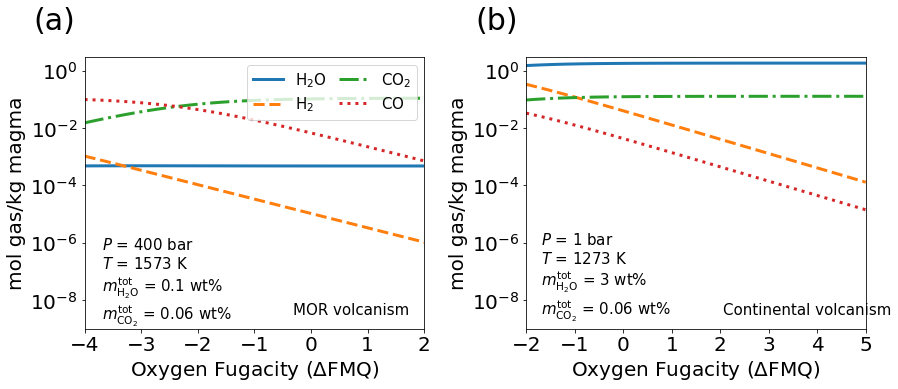

In [3]:
### MORB (mid-ocean ridge basalt) volcanism ###
mCO2tot=5000e-6 # MORB CO2 content 
mH2Otot=1000e-6 # MORB H2O content 
# set total pressure and temperature
n = 50
T = 1573 # MORB magma temperature (kelvin)
P = 400 # MORB pressure (bar)
FMQ = np.linspace(-4,2,n) # range of MORB oxygen fugacities 

x = 0.01550152865954013 # mol magma/g magma

H2O = []
H2 = []
CO2 = []
CO = []
CH4 = []
ff_O2 = []
for i in range(0,n):
    TT = T
    # set the Oxygen fugacity to FMQ
    A = 25738
    B = 9
    C = 0.092
    log_FMQ = (-A/TT+B+C*(P-1)/TT)
    f_O2 = 10**(log_FMQ+FMQ[i])
    # set to FMQ
    ff_O2.append(f_O2)
    P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
    H2O.append(1000*alphaG*x*(1/(1-alphaG))*P_H2O/P)
    H2.append(1000*alphaG*x*(1/(1-alphaG))*P_H2/P)
    CO2.append(1000*alphaG*x*(1/(1-alphaG))*P_CO2/P)
    CO.append(1000*alphaG*x*(1/(1-alphaG))*P_CO/P)
    CH4.append(1000*alphaG*x*(1/(1-alphaG))*P_CH4/P)
    
    
lwdt = 3
plt.rcParams.update({'font.size': 20})
fig,[ax,ax1] = plt.subplots(1,2,figsize = [14,5])
ax.plot(FMQ,H2O,'-',label='$\mathrm{H_2O}$',linewidth=lwdt)
ax.plot(FMQ,H2,'--',label='$\mathrm{H_2}$',linewidth=lwdt)
ax.plot(FMQ,CO2,'-.',label='$\mathrm{CO_2}$',linewidth=lwdt)
ax.plot(FMQ,CO,':',label='$\mathrm{CO}$',linewidth=lwdt)
# ax.plot(FMQ,CH4,'x',label='$\mathrm{CH_4}$',linewidth=lwdt)
ax.set_yscale('log')
ax.set_xlim(min(FMQ),max(FMQ))
ax.set_ylim(1e-9,3)
ax.set_yticks(10**np.arange(-8.,1.,2))
ax.set_xticks(np.arange(min(FMQ),max(FMQ)+1,1))
ax.set_xlabel('Oxygen Fugacity ($\Delta$FMQ)')
ax.set_ylabel('mol gas/kg magma')
ax.legend(ncol=2,columnspacing=.8,labelspacing=.4,loc=1,fontsize=15)
ax.text(-3.7,2e-9,'$P$ = 400 bar\n$T$ = 1573 K\n$m_{\mathrm{H_2O}}^{\mathrm{tot}}$ = 0.1 wt%\n$m_{\mathrm{CO_2}}^{\mathrm{tot}}$ = 0.06 wt%',fontsize = 15)


### Continental volcanism ###
mCO2tot=5000e-6
mH2Otot=30000e-6
# set total pressure and temperature
n = 50
T = 1000+273 # kelvin
P = 1 # bar
FMQ = np.linspace(-2,5,n)
H2O = []
H2 = []
CO2 = []
CO = []
CH4 = []
ff_O2 = []
for i in range(0,n):
    TT = T
    # set the Oxygen fugacity to FMQ
    A = 25738
    B = 9
    C = 0.092
    log_FMQ = (-A/TT+B+C*(P-1)/TT)
    f_O2 = 10**(log_FMQ+FMQ[i])
    # set to FMQ
    
    ff_O2.append(f_O2)


    P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
    H2O.append(1000*alphaG*x*(1/(1-alphaG))*P_H2O/P)
    H2.append(1000*alphaG*x*(1/(1-alphaG))*P_H2/P)
    CO2.append(1000*alphaG*x*(1/(1-alphaG))*P_CO2/P)
    CO.append(1000*alphaG*x*(1/(1-alphaG))*P_CO/P)
    CH4.append(1000*alphaG*x*(1/(1-alphaG))*P_CH4/P)

ax1.plot(FMQ,H2O,'-',label='$\mathrm{H_2O}$',linewidth=lwdt)
ax1.plot(FMQ,H2,'--',label='$\mathrm{H_2}$',linewidth=lwdt)
ax1.plot(FMQ,CO2,'-.',label='$\mathrm{CO_2}$',linewidth=lwdt)
ax1.plot(FMQ,CO,':',label='$\mathrm{CO}$',linewidth=lwdt)
#ax1.plot(FMQ,CH4,'x',label='$\mathrm{CH_4}$',linewidth=lwdt)
ax1.set_yscale('log')
ax1.set_xlim(min(FMQ),max(FMQ))
ax1.set_ylim(1e-9,3)
ax1.set_yticks(10**np.arange(-8.,1.,2))
ax1.set_xticks(np.arange(min(FMQ),max(FMQ)+1,1))
ax1.set_xlabel('Oxygen Fugacity ($\Delta$FMQ)')
ax1.set_ylabel('mol gas/kg magma')
ax1.text(-1.7,3e-9,'$P$ = 1 bar\n$T$ = 1273 K\n$m_{\mathrm{H_2O}}^{\mathrm{tot}}$ = 3 wt%\n$m_{\mathrm{CO_2}}^{\mathrm{tot}}$ = 0.06 wt%',fontsize = 15)
ax1.text(3.8,3e-9,'Continental volcanism',horizontalalignment='center',fontsize = 15)
ax.text(.7,3e-9,'MOR volcanism',horizontalalignment='center',fontsize = 15)
plt.subplots_adjust(wspace=.3)
ax.text(-0.15, 1.10, '(a)', transform=ax.transAxes,size=30)
ax1.text(-0.15, 1.10, '(b)', transform=ax1.transAxes,size=30)
# plt.savefig("save_fig.pdf",bbox_inches='tight')

plt.show()